### Credit Card Fraud detection 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Data description states that feature have gone through PCA (Principal Component Analysis) in order to reduce dimensionality.
#### Features have also been scaled (prereq to applying PCA)

In [4]:
# Reading in data:

data = pd.read_csv('/Users/roya/Downloads/creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data has 284807 transactions and 30 features. The target is to predict the class of transaction, fraud or valid.

## Exploratory Data Analaysis

In [7]:
# To have an overview
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Checking for null values:
data.isnull().sum().max()

0

Since data has undergone transformation prior to release, we have no null values which makes it easier since we do not have to make assumptions and do impuatations.

For the purpose of EDA, we will compare the distribution of features for Fraudulent and Valid transaction.

In [9]:
features = data.iloc[:, 0:30].columns

In [10]:
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

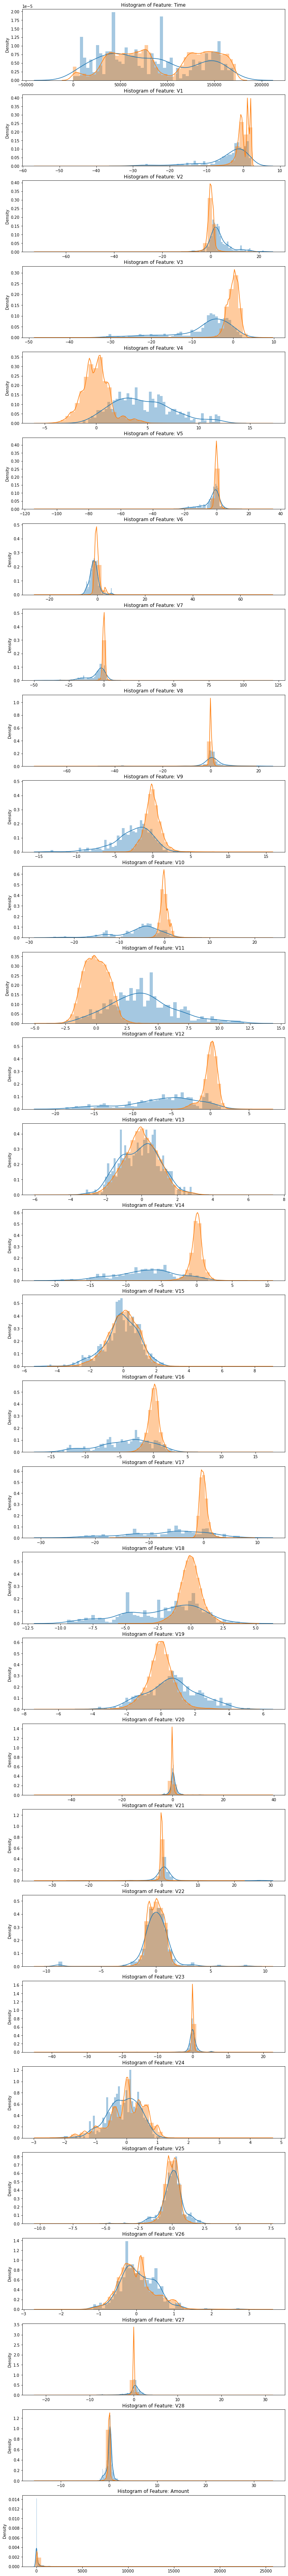

In [14]:
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, column_name in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[column_name][data.Class == 1], bins= 50, label= 'Fraudulent' )
    sns.distplot(data[column_name][data.Class == 0], bins= 50, label= 'Valid')
    ax.set_xlabel('')
    ax.set_title('Histogram of Feature: ' + str(column_name))
    
 
plt.show()

Blue histogram shows fradulent transactions and orange shows valid transactions. By looking at Time feature, we can see that it can help predict on off-peak times. I will drop anonymized features that have similar distribution for Fraudulent and valid transaction:
- V8
- V13
- V15
- V20
- V22
- V23
- V24
- V25
- V26
- V27
- V28


In [15]:
# dropping above-mentioned columns:
data.drop(['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1, inplace=True)

In [16]:
# double checking the shape of dataframe after dropping 11 columns:
data.shape

(284807, 20)

#### Scaling Time and Amount features 

Since the rest of features are already scaled, we only need to scale Time and Amount:

In [17]:
#initiating scaler:
scaler = StandardScaler()

In [18]:
#fitting and transforming:

data['Time'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Amount'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))


In [19]:
# checking dataset:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403,0


As we can see, Time and Amount features are now scaled.

In [20]:
# Checking how imbalanced is our dataset:
print('Valid', data['Class'].value_counts()[0]/len(data) * 100, '% of the dataset')


Valid 99.82725143693798 % of the dataset


Number_of_Fraud=  492
Number_of_Valid=  284315


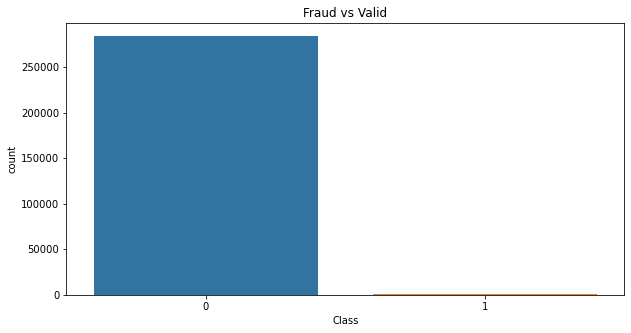

In [21]:
# visual display of class distribution


fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.countplot('Class', data=data)
plt.title('Fraud vs Valid')

print('Number_of_Fraud= ', data['Class'].value_counts()[1])
print('Number_of_Valid= ', data['Class'].value_counts()[0])

99.83% of our dataset is valid transaction and only 0.17% of it is Fraudulent. Our data is highly imbalanced and using this data for predictive model will probably cause overfitting. If the model predicts "Valid" for every transaction, it will have a 99.83% accuracy but it's not a good model. We need to address this issue.

In order to solve this issue, we will use undersampling method to balance the data. In other words, we will randomly choose 492 transactions from valid transactions.

In [22]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]
valid_data = data.loc[data['Class'] == 0][:492]

concatenated_data = pd.concat([fraud_data, valid_data])

# Shuffling concatenated data
balanced_data = concatenated_data.sample(frac=1)

balanced_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
189878,-0.349231,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,0.215475,-2.297734,1.961481,-1.944441,-4.346348,-1.820405,-3.746490,-0.880399,0.267915,8.664662,-0.349231,1
150692,-0.201582,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,-6.241960,-12.618163,6.057319,-15.717607,-8.653743,-11.231364,-21.585152,-9.090892,1.171189,1.082235,-0.201582,1
155638,-0.308171,-0.440318,0.694130,1.927866,-0.347063,0.534623,0.315181,0.452398,1.750269,-1.118670,-0.816988,-3.522126,1.413848,0.025303,0.035571,0.912828,0.869963,-0.380065,-0.308171,0
176088,-0.293258,-0.281026,0.253794,0.092892,-1.323924,0.651647,-1.541955,0.593249,-1.567806,-0.383382,-0.403169,-0.755851,-1.415141,0.749531,1.431310,-1.171883,1.050898,0.083147,-0.293258,0
151730,-0.277426,-1.952933,3.541385,-1.310561,5.955664,-1.003993,0.983049,-4.587235,-2.516752,-2.850324,2.024674,-6.487746,-2.241516,-3.936857,-6.127194,-2.328552,1.562130,-1.998091,-0.277426,1
116520,-0.193306,1.133426,0.335132,0.138576,1.196178,0.041975,-0.596596,0.404002,-0.248878,-0.009259,-0.090551,0.303902,0.577997,-0.249514,-0.079850,-1.118347,-0.516804,-0.342227,-0.193306,0
83345,-0.294857,-1.414802,1.369290,0.500958,-1.355142,-0.579127,-0.859147,0.015926,0.260282,-0.373559,-1.080283,0.124579,0.142186,0.923154,-0.686111,-0.198003,-0.590418,-0.106872,-0.294857,0
167305,0.070128,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-0.950036,0.566680,4.315076,-4.938284,-8.490813,-1.949123,-3.093013,0.124087,0.886747,5.563301,0.070128,1
15204,0.046539,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,-3.999861,-8.928656,5.849293,-8.261650,-8.829359,-7.070953,-13.629721,-4.958830,1.272091,1.746802,0.046539,1
42696,-0.000478,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,-7.051016,-12.265324,7.047733,-13.742953,-14.107464,-11.847887,-21.673987,-7.784042,3.204309,2.427460,-0.000478,1


In [23]:
# Checking if undersampling was done right and data has been balanced:
print('Number_of_Fraud= ', balanced_data['Class'].value_counts()[1])
print('Number_of_Valid= ', balanced_data['Class'].value_counts()[0])

Number_of_Fraud=  492
Number_of_Valid=  492


We have equal number of Fraud and Valid transactions.

#### Correlation Matrices:

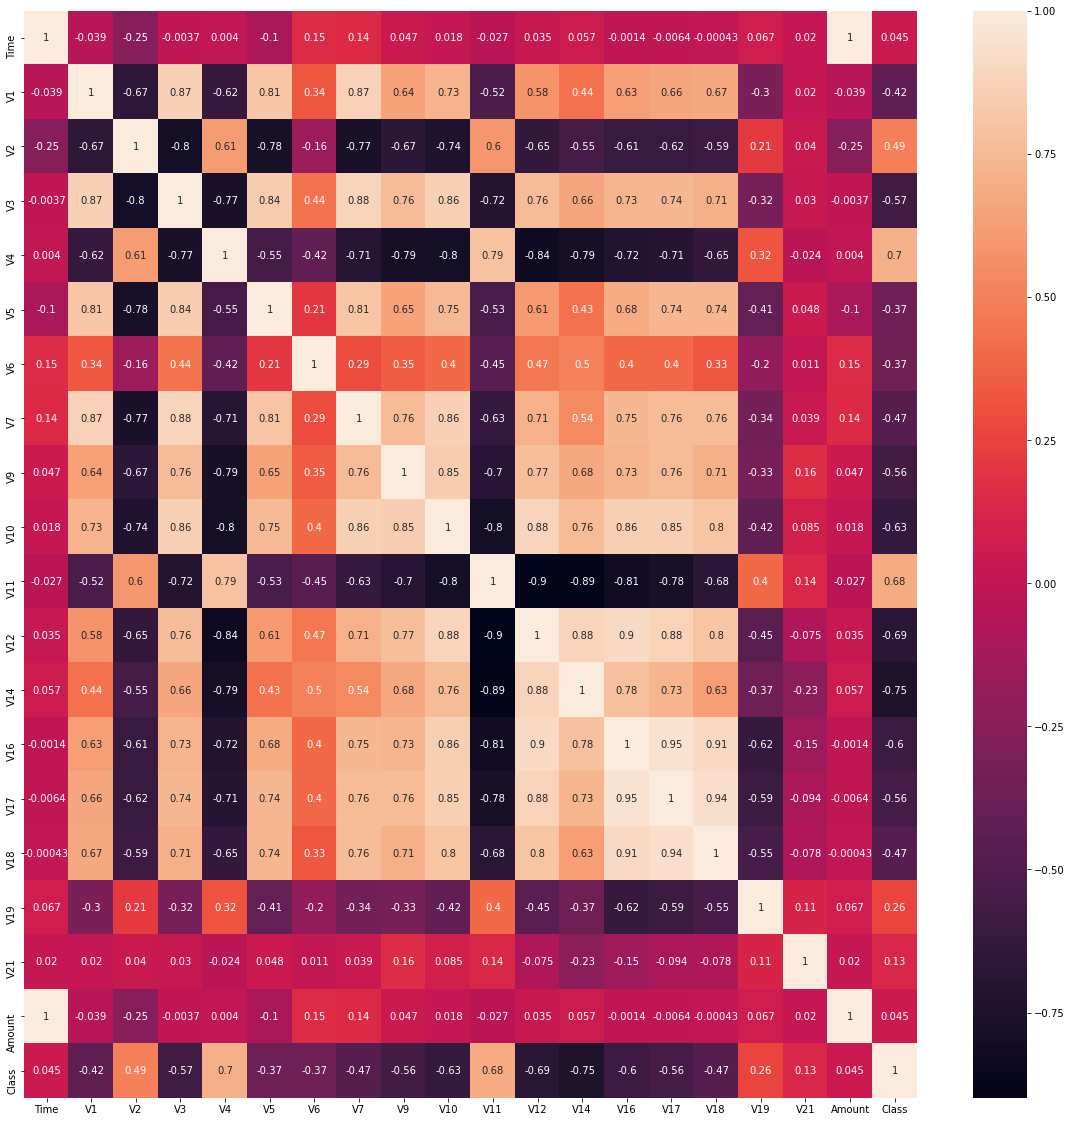

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
Time,1.000000,-0.038997,-0.253796,-0.003728,0.003994,-0.099838,0.152816,0.143121,0.046683,0.017841,-0.027118,0.034523,0.057053,-0.001447,-0.006379,-0.000433,0.067027,0.019681,1.000000,0.045265
V1,-0.038997,1.000000,-0.668353,0.866434,-0.619831,0.809578,0.337210,0.866810,0.640055,0.725507,-0.519975,0.582350,0.435626,0.625436,0.664790,0.669473,-0.299794,0.019707,-0.038997,-0.424868
V2,-0.253796,-0.668353,1.000000,-0.797769,0.614999,-0.775248,-0.162596,-0.771974,-0.673656,-0.740708,0.596464,-0.646028,-0.554262,-0.612641,-0.616091,-0.588383,0.214262,0.040259,-0.253796,0.488789
V3,-0.003728,0.866434,-0.797769,1.000000,-0.772168,0.843729,0.441567,0.881338,0.763614,0.860512,-0.719901,0.764852,0.659318,0.731169,0.741000,0.708717,-0.318729,0.030199,-0.003728,-0.572568
V4,0.003994,-0.619831,0.614999,-0.772168,1.000000,-0.554340,-0.420167,-0.705243,-0.787487,-0.795611,0.794262,-0.836025,-0.785553,-0.723640,-0.707306,-0.645548,0.318936,-0.024460,0.003994,0.703333
V5,-0.099838,0.809578,-0.775248,0.843729,-0.554340,1.000000,0.205049,0.805010,0.645828,0.750202,-0.528034,0.613955,0.431910,0.683122,0.737750,0.736136,-0.405640,0.048378,-0.099838,-0.368561
V6,0.152816,0.337210,-0.162596,0.441567,-0.420167,0.205049,1.000000,0.293538,0.353621,0.399900,-0.453902,0.465498,0.495961,0.400843,0.397022,0.329693,-0.203038,0.010919,0.152816,-0.365997
V7,0.143121,0.866810,-0.771974,0.881338,-0.705243,0.805010,0.293538,1.000000,0.759948,0.859542,-0.629157,0.714291,0.537524,0.745268,0.762602,0.757447,-0.339973,0.038996,0.143121,-0.470069
V9,0.046683,0.640055,-0.673656,0.763614,-0.787487,0.645828,0.353621,0.759948,1.000000,0.847789,-0.695694,0.770776,0.675398,0.730176,0.756608,0.708476,-0.326736,0.157521,0.046683,-0.561668
V10,0.017841,0.725507,-0.740708,0.860512,-0.795611,0.750202,0.399900,0.859542,0.847789,1.000000,-0.800483,0.883183,0.757535,0.855866,0.853704,0.803852,-0.417089,0.085379,0.017841,-0.629306


In [24]:
fig, axes = plt.subplots(1,1, figsize=(20, 20))
corrMatrix = balanced_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

From above correlation matrix, we can see that there's a strong positive correlation between V2,V4, V11 and Class. Also we can see that there's a strong negative correlation between V10, V12, V14 and Class. 

### Modeling

In [25]:
# X: our feature
# Y: our target
X = balanced_data.drop('Class', axis=1)
Y = balanced_data['Class']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Logistic Regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [28]:
# instanitating Logistic Regression model
my_logreg = LogisticRegression(random_state=1)


scores = cross_val_score(my_logreg, X_train, y_train, cv = 5)
print(scores.mean())

0.9300733693461259


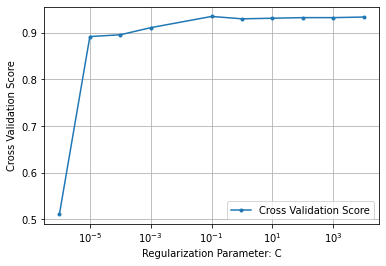

The best model has C =  0.1


In [45]:
# Optimizing C for Logistic Regression

cross_validation_scores = []

C_range = np.array([.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,])

# Doing some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

In [47]:
# instanitating Logistic Regression model
my_logreg = LogisticRegression(C=0.1, random_state=1)

my_logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=1)

In [49]:
print(f'Score on test: {my_logreg.score(X_test, y_test)}')

Score on test: 0.9441624365482234


In [53]:
y_pred = my_logreg.predict(X_test)

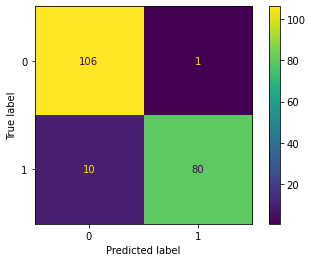

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

cf_matrix= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

- we had 107 valid transactions in our test set and we classified 106 of them correctly.
- we had 90 fraudulent transactions in our test set and we classified 80 of them correctly using Logistic Regression (Recall= 89%).

### Deep Learning Model

In [56]:
import tensorflow as tf

In [71]:
del model

In [72]:
model= tf.keras.models.Sequential(tf.keras.layers.Dense(units=20,activation='relu'))
model= tf.keras.models.Sequential(tf.keras.layers.Dense(units=20,activation='relu'))
model= tf.keras.models.Sequential(tf.keras.layers.Dense(units=20,activation='relu'))

In [73]:
model= tf.keras.models.Sequential(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [74]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])


In [75]:
model.fit(X_train,y_train, batch_size=5,epochs=45)

Epoch 1/45

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

158/158 [==============================] - 0s 603us/step - loss: 0.4561 - accuracy: 0.7357
Epoch 2/45
158/158 [==============================] - 0s 568us/step - loss: 0.4066 - accuracy: 0.7840
Epoch 3/45
158/158 [==============================] - 0s 569us/step - loss: 0.3677 - accuracy: 0.8183
Epoch 4/45
158/158 [==============================] - 0s 570us/step - loss: 0.3362 - accuracy: 0.8615
Epoch 5/45
158/158 [==============================] - 0s 571us/step - loss: 0.3098 - accuracy: 0.893

In [76]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test, Y_pred)

[[106   1]
 [  9  81]]


0.949238578680203

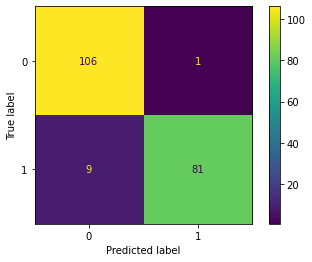

In [78]:
cf_matrix_dl= confusion_matrix(y_test, Y_pred)
ConfusionMatrixDisplay(cf_matrix_dl).plot()
plt.show()

- we had 107 valid transactions in our test set and we classified 106 of them correctly.
- we had 90 fraudulent transactions in our test set and we classified 81 of them correctly using Logistic Regression (Recall= 90%).

Deep learning had a slightly better performance that logistic regression. 